# **Import e Dados iniciais**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split    #Apenas para serparar os dados
from collections import Counter


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [ ]:
df = pd.read_csv('creditcard.csv')

df = df.dropna()
print(df.shape)
print(df.columns)

df.describe()
##Não há grandes discrepâncias


(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **Rede Neural de uma camada usando numpy**

Para este caso, foi utilizado o train test split do SKlearn apenas para dividir os dados. No resto do código a unica lib usada foi o Numpy

In [ ]:
#Dividimos os dados nas váriaveis, X com os parametros, y com a classe binária

X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

y = df['Class']

X = X.to_numpy()
y = y.to_numpy()

In [ ]:
#Dividimos os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Tiramos a transposta de X train e invertemos as linhas e colunas de y train
#Fazemos isso pois usamos dessa maneira na hora de construir nossa rede

print('Shape do treino')
print("Antes: ", X_train.shape)
print("Antes: ", y_train.shape)
X_train = X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
print('Depois: ', X_train.shape)
print('Depois: ', y_train.shape)

#Fazemos o mesmo com o teste
X_test = X_test.T
y_test = y_test.reshape(1, y_test.shape[0])


print ('Shape do teste: ', X_test.shape)

Shape do treino
Antes:  (227845, 29)
Antes:  (227845,)
Depois:  (29, 227845)
Depois:  (1, 227845)
Shape do teste:  (29, 56962)


In [ ]:
#Função que define a estrutura da rede 
def define_structure(X, Y):
    input_unit = X.shape[0] # Tamanho da entrada
    hidden_unit = 4 #Tamanho da camada oculta
    output_unit = Y.shape[0] # Tamanho da camada de saída
    return (input_unit, hidden_unit, output_unit)

(input_unit, hidden_unit, output_unit) = define_structure(X_train, y_train)
print("Tamanho da camada de entrada: " + str(input_unit))
print("Tamanho da camada oculata: " + str(hidden_unit))
print("Tamanho da camada de saída: " + str(output_unit))

Tamanho da camada de entrada: 29
Tamanho da camada oculata: 4
Tamanho da camada de saída: 1


In [ ]:
#Inicialização dos parametros

def parameters_initialization(input_unit, hidden_unit, output_unit):
    np.random.seed(2) 
    #Gera um array aleatório de dimensoes de entrada e meio da rede neural
    #Gera em forma de distribuição normal
    W1 = np.random.randn(hidden_unit, input_unit)*0.01   #Gera um array aleatório de dimensoes da rede neural
    b1 = np.zeros((hidden_unit, 1)) #Inicialmente o Bias é zero
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1)) #Inicialmente o Bias é zero
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [ ]:
#Na Função de propagação, usaremos da entrada para o hidden, a função de ativação tanh

#Do Hidden para a saída, usaremos a função de ativação sigmoide

def sigmoid(z):
    return 1/(1+np.exp(-z))

#Propagação para a frente
def forward_propagation(X, parameters):
    W1 = parameters['W1'] #Esses parametros eram arrays definidos da função anterior
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1 #dot é produto de dois arrays
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

Fórmulas utilizadas na célula acima

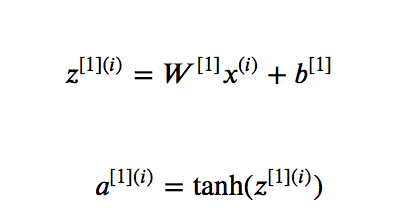

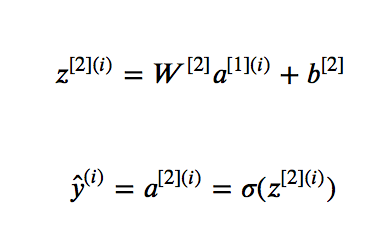

In [ ]:
#Custo do modelo - Entropia

def cross_entropy_cost(A2, Y, parameters):
    # Número de exemplos de treino
    m = Y.shape[1] 
    # Custo de entropia
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
                                    
    return cost

Fórmula utilizada na célula acima

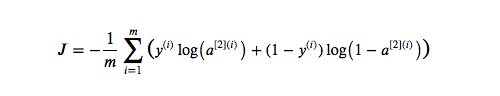

In [ ]:
#Função que calcula o gradiente - Propagação para reversa

def backward_propagation(parameters, cache, X, Y):
    #Número de exemplos de treino
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
   
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
    return grads

Fórmulas da célula acima

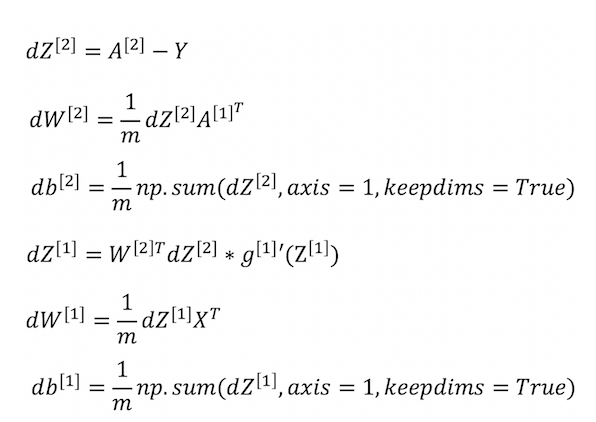

In [ ]:
#Gradient descent - Atualização dos parametros - learning rate

def gradient_descent(parameters, grads, learning_rate = 0.01):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
    return parameters

Fórmula usada acima onde tetha é o parametro e alpha é o learning rate

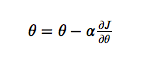

In [ ]:
#Modelo da Rede Neural

def neural_network_model(X, Y, hidden_unit, num_iterations = 1000):
    np.random.seed(3)

    #Define a estrutura da rede, pegando os parametros de entrada e saída da rede da função
    input_unit = define_structure(X, Y)[0]
    output_unit = define_structure(X, Y)[2]
    
    #Passamos os parametros para a rede pela função
    parameters = parameters_initialization(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #Realizamos os passos
    #
    for i in range(0, num_iterations):
        #Propagação para a frente - metodo de propagação
        A2, cache = forward_propagation(X, parameters)
        #Custo de entropria
        cost = cross_entropy_cost(A2, Y, parameters)
        #Propagação para trás - gradiente
        grads = backward_propagation(parameters, cache, X, Y)
        #Gradiente descent para atualizar os parametros
        parameters = gradient_descent(parameters, grads)
        #Se i divido por 5 tem resto zero, imprime
        if i % 100 == 0:
            print ("Custo depois da iteração %i: %f" %(i, cost))
    return parameters

parameters = neural_network_model(X_train, y_train, 4, num_iterations = 1000)

Custo depois da iteração 0: 0.700592
Custo depois da iteração 100: 0.308441
Custo depois da iteração 200: 0.172662
Custo depois da iteração 300: 0.116875
Custo depois da iteração 400: 0.087660
Custo depois da iteração 500: 0.070033
Custo depois da iteração 600: 0.058383
Custo depois da iteração 700: 0.050178
Custo depois da iteração 800: 0.044120
Custo depois da iteração 900: 0.039482


In [ ]:
#Com isso, usando os parametros encontrados podemos realizar previsões
#Usando foward propagation

def prediction(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

In [ ]:
#Aqui fazemos as previsões com dados de treino e teste e medimos a acurácia

predictions = prediction(parameters, X_train)
print ('Precisão de treino: %d' % float((np.dot(y_train, predictions.T) + np.dot(1 - y_train, 1 - predictions.T))/float(y_train.size)*100) + '%')
predictions = prediction(parameters, X_test)
print ('Precisão de teste: %d' % float((np.dot(y_test, predictions.T) + np.dot(1 - y_test, 1 - predictions.T))/float(y_test.size)*100) + '%')

Precisão de treino: 99%
Precisão de teste: 99%


In [ ]:
predictions_test = prediction(parameters, X_test)
predictions_train = prediction(parameters, X_train)

teste = predictions_test == y_test
treino = predictions_train == y_train

print('Valores iguais no teste: ', np.count_nonzero(teste == True))
print('Valores diferentes no teste: ', np.count_nonzero(teste == False))

print('Valores iguais no treino: ', np.count_nonzero(treino == True))
print('Valores diferentes no treino: ', np.count_nonzero(treino == False))



Valores iguais no teste:  56872
Valores diferentes no teste:  90
Valores iguais no treino:  227478
Valores diferentes no treino:  367


**Comparando em termos quantitativos**

*1 Neuronio*

Valores iguais no teste:  56872 

Valores diferentes no teste:  90

Valores iguais no treino:  227478

Valores diferentes no treino:  367

Para mais neuronios, o modelo se mantem com os mesmos valores, porem o dataset é desbalanceado, e por conta disso os resultados não são tão satisfatórios.



**Custo de entropia da iteração 900 - para 1 Neuronio**

Para o Learning Rate de 0,01 = 0.042178

Para o Learning Rate de 0,1 = 0.016987

Para o Learning Rate de 0,001 = 0,330102

**Custo de entropia da iteração 900 - para 2 neurônios**

Para o Learning Rate de 0,01 = 0.034876

Para o Learning Rate de 0,1 = 0.004921

Para o Learning Rate de 0,001 = 0.358196



Percebe-se que o custo diminui mais rapidamente a medida que aumentamos o learning rate, porém não podemos tomar isso como premissa e aumentar demais o learning rate, pois a partir de certo momento, seria impossível tornar o modelo mais preciso. Porém para este caso analisado, isso não faz diferença, tendo em vista que para qualquer um dos learning rates testados, o resultado teve acurácia de 99%. 

De fato, é possível observar que o aumento de 1 para 2 neuronios na camada oculta, faz com que exista melhora no custo, de modo que ele cai mais rápido. Isso acontece pois temos mais um parametro para treinar nossa rede. No mais, é importante observar que para o learning rate muito baixo, isso quase não faz diferença, o que pode indicar que a taxa de 0,001 possa ser muito baixa.

O modelo apresentado não apresenta problemas de Over e Underfitting, tendo em vista a boa performance ótima para os dados de treino e os dados de teste.

Também podemos observar pelo modelo desenvolvido, que para uma quantidade menor de neuronios na camada do meio, o custo demora bem mais a cair. Porém, o que se observa para esses dados é que a precisão se mantém como estava em 99% no caso de 4 neuronios

# **Rede Neural com 2 camadas ocultas**



In [101]:
#Dividimos os dados nas váriaveis, X com os parametros, y com a classe binária

X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

y = df['Class']

X = X.to_numpy()
y = y.to_numpy()

In [102]:
#Dividimos os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Tiramos a transposta de X train e invertemos as linhas e colunas de y train
#Fazemos isso pois usamos dessa maneira na hora de construir nossa rede

print('Shape do treino')
print("Antes: ", X_train.shape)
print("Antes: ", y_train.shape)



print ('Shape do teste: ', X_test.shape)

Shape do treino
Antes:  (227845, 29)
Antes:  (227845,)
Shape do teste:  (56962, 29)


In [103]:
#Escolhe o modelo

#Sequential empilha camadas

#Flatten - input_shape - amostra do dataset - no caso, 29 colunas
##Não é legal usar flatten, pois eu passo os dados linha por linha

#Relu - Rectified Linear Unit - Replica a entrada na saída se a entrada for positiva e zero para o resto

#Dense - (tamanho da saída dela, função de ativação da camada) - Operação que acontece no neuronio

#Dropout - Ignora alguns neuronios durante o treinamento, de forma aleatoria, fazemos isso pois os
## neuronios podem depender entre si, o que pode causar overfitting

#Camada final é responsável por entregar o resultado. Usamos 1 neuronio pois estamos fazendo a previsão, porata

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(29, activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

#Tentar usar a ativação step

#Compile - Como que eu vou treinar
#Adam - uma função de otimização que usa gradiente descendente
#loss - Função de custo
#Metrics - Metrica usada para treinar

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [104]:
model.fit(X_train, y_train, epochs=5)

model.evaluate(X_test,  y_test, verbose=2)

Epoch 1/5
7121/7121 [==============================] - 19s 3ms/step - loss: 0.0561 - accuracy: 0.9925
Epoch 2/5
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0074 - accuracy: 0.9990
Epoch 3/5
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0066 - accuracy: 0.9989
Epoch 4/5
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0058 - accuracy: 0.9990
Epoch 5/5
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0058 - accuracy: 0.9990
1781/1781 - 2s - loss: 0.0039 - accuracy: 0.9993 - 2s/epoch - 1ms/step


[0.003907825797796249, 0.9992626905441284]

In [108]:
aa = model.predict(X_test)
a = model.predict(X_train)





In [109]:
aa

array([[9.9999690e-01],
       [6.0591102e-04],
       [2.1988153e-04],
       ...,
       [4.9120285e-06],
       [1.7713202e-07],
       [6.0591102e-04]], dtype=float32)

In [110]:
a

array([[2.7001632e-05],
       [2.6220319e-05],
       [5.8347196e-06],
       ...,
       [3.2937527e-04],
       [1.8150483e-21],
       [6.0591102e-04]], dtype=float32)